In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import math
import galois
from functools import reduce
import warnings
warnings.filterwarnings("ignore")

In [ ]:
primes = [1, 3, 7, 11, 13, 17, 19, 37, 59, 47, 61, 55, 41, 67, 97, 91, 109, 103, 115,
          131, 193, 137, 145, 143, 241, 157, 185, 167, 229, 171, 213, 191, 253, 203, 
          211, 239, 247, 285, 369, 299, 425, 301, 361, 333, 357, 351, 501, 355, 397, 391, 451, 463, 487]

In [41]:
def convert_number_system(number):
    ans = []
    temp = number
    while number >= 2:
        ans.append(number % 2)
        number = number // 2
    ans.append(number)
    return ans

In [42]:
def get_sobol_polynom(deg):
    poly = galois.GF(2**deg).properties.split('\n')[5].split()[1:]
    for i in range(int(len(poly) / 2)):
        poly.remove("+")
    poly = list(map(lambda x: x[-1], poly))
    for i in poly:
        if i == 'x':
            poly[poly.index('x')] = 1.1
    poly = list(map(float, poly))

    degs_poly = np.zeros(deg + 1)
    for i in poly:
        if i == 1:
            degs_poly[0] = 1
        elif i == 1.1:
            degs_poly[1] = 1
        else:
            degs_poly[int(i)] = 1
    return degs_poly[::-1][1:]

In [43]:
def get_primes(deg):
    a = np.array([])
    for number in range(1, deg + 1):
        if number != 2: 
            for i in range(2, number): 
                if(number % i) == 0: 
                    break 
            else: 
                a = np.append(a, number)
    return a

In [78]:
def get_sobol_m(deg, max_j):
    c = list(map(int, get_sobol_polynom(deg)))
    m = list(map(int, get_primes(2 ** deg)))[:-1]
    xor_list = []

    for j in range(deg, max_j):
        for k in range(j - deg, j):
            xor_list.append(int(pow(2, k + 1 + deg - j) * c[k + deg - j] * m[j - k - 1 + j - deg]))
        xor_list.append(m[j - deg])
        res = reduce(lambda x, y: x ^ y, xor_list[-1: -(deg + 2): -1][::-1])
        m.append(res)
    return m

In [45]:
def get_sobol_V(deg, r):
    V = (list(map(convert_number_system, get_sobol_m(deg, r))))
    for j in range(r):
        if j + 1 > len(V[j]):
            V[j] = list(np.zeros(j + 1 - len(V[j]))) + V[j]

    for j in range(r):
        V[j] = V[j] + list(np.zeros(r - len(V[j])))
    return np.array(V)

In [118]:
a = get_sobol_V(5, 9)
b = get_sobol_V(6, 9)

In [125]:
a = np.array(list(map(np.array, a)))
b = np.array(list(map(np.array, b)))

In [46]:
# max_j = r
def get_sobol_many_y(deg, r):
    V = get_sobol_V(deg, r)
    max_k = 2 ** r
    y = np.zeros((max_k, r))
    for k in range(1, max_k):
        a = convert_number_system(k)
        a = a + list(np.zeros(r - len(a)))
        temp = []
        for j in range(r):
            temp.append(np.array(V[j]).astype('float') * float(a[j]))
        temp = np.array(temp).astype('int').T
        for i in range(len(temp)):
            y[k][i] = reduce(lambda x, y: x ^ y, temp[i])
    return y[1:]

In [47]:
# max_j = r
def get_sobol_y(deg, r, k):
    V = get_sobol_V(deg, r)
    y = np.zeros(r)
    a = convert_number_system(k)
    a = a + list(np.zeros(r - len(a)))
    temp = []
    for j in range(r):
        temp.append(np.array(V[j]).astype('float') * float(a[j]))
    temp = np.array(temp).astype('int').T
    for i in range(len(temp)):
        y[i] = reduce(lambda x, y: x ^ y, temp[i])
    return y

In [48]:
def get_sobol_x(deg, r, k):
    y = get_sobol_y(deg, r, k)
    ans = 0
    for i in range(r):
        ans += y[i] / pow(2, i + 1)
    return ans

In [88]:
def get_sobol_seq_4(deg, r):
    sobol_seq = np.zeros(2 ** r - 1)
    for i in range(1, 2 ** r):
        sobol_seq[i - 1] = get_sobol_x(deg, r, i)
        #sobol_seq.append(get_sobol_x(deg, r, i))
    return sobol_seq

In [80]:
def get_sobol(deg_min, deg_max, r):
    ans = []
    for deg in tqdm(range(deg_min, deg_max + 1)):
        ans.append(get_sobol_seq_4(deg, r))
    return ans

In [154]:
s_sobol = get_sobol(3, 8, 11)

100%|██████████| 6/6 [00:20<00:00,  3.34s/it]


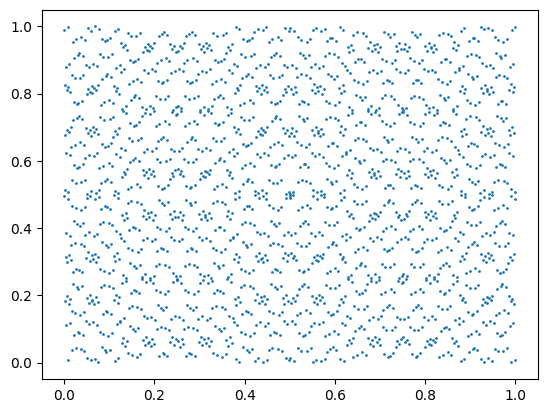

In [155]:
plt.scatter(s_sobol[0], s_sobol[3], 1)

In [148]:
a = get_sobol_seq_4(4, 9)
b = get_sobol_seq_4(5, 9)

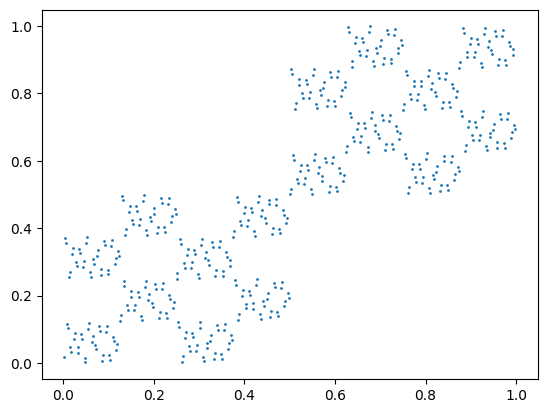

In [149]:
plt.scatter(a, b, 1)